<h1 style="color:rgb(0,120,170)">344.038, KV Multimedia Search and Retrieval (WS2023/24)</h1>
<h2 style="color:rgb(0,120,170)">Task 2_Group B</h2>

| First Name | Family Name  | Matr.Nr   |
|:-----------|:-------------|:----------|
| Harald     | Eibensteiner | K01300179 |
| Hadi       | Sanaei       | K11733444 |
| Lukas      | Troyer       | K12006666 |
| Lukas      | Wagner       | K01357626 |
| Branko     | Paunović     | K12046370 |

### Load Data & Imports

In [16]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import numpy as np
import pandas as pd
from song import Song, songs
from retrieval import Retrieval, SimilarityMeasure

### Retrieve top N similar tracks

In [18]:
# Number of similar songs to retrieve
N = 10
num_top_similar = int(input("Enter the number of top similar tracks: "))

# Example:
#   - Title: Letterman
#   - Artist: Wiz Khalifa
query, query_row_id = songs.prompt_song_query()

### Audio-based(similarity, MFCC)

In [19]:
# Sample query ID:  GDGURAgKxNPEuXzM

# retrieve_top_similar_tracks("GDGURAgKxNPEuXzM", mfcc_bow_data, information_data, num_top_similar)
# retrieve_top_similar_tracks("GDGURAgKxNPEuXzM", mfcc_stats_data, information_data, num_top_similar)
Retrieval(n=N).retrieve_top_similar_tracks(query_row_id, "mfcc_bow")


,id,similarity,song,artist
0,QbrBgVgAfI75hR3y,0.938748,Soulja's Story,2Pac
1,aqGzvg198LcJo0f6,0.938123,Whisper,VIXX LR
2,ost5WwHhojQYkCoV,0.935841,Best 4 U,Maroon 5
3,15hcBfdPhrtLVay2,0.934217,DNA,BTS
4,iHRt8u88DH1Dq7SP,0.933773,Loyal,Chris Brown
5,JCoVLNWgRrFWoVo5,0.933475,SHALL WE DANCE,Block B
6,GtDftmP0Fq5ueCh0,0.931576,Les Champs-Elysées,Joe Dassin
7,c7MBpdUlwywl4pLd,0.929431,EveryGirl In The World,Young Money
8,i9VU3HjsLHEVcM3T,0.929228,Starlight (Radio Edit),The Supermen Lovers
9,h2b5Pi6kMqyAK83G,0.928990,Look Into My Eyes,Bone Thugs-N-Harmony


### Audio-based(similarity, BLFs)

In [20]:
#num_top_similar = int(input("Enter the number of top similar tracks: "))
# retrieve_top_similar_tracks("GDGURAgKxNPEuXzM", blf_correlation_data, information_data, num_top_similar)
# retrieve_top_similar_tracks("GDGURAgKxNPEuXzM", blf_spectral_data, information_data, num_top_similar)
Retrieval(n=N).retrieve_top_similar_tracks(query_row_id, "blf_correlation")

,id,similarity,song,artist
0,qysJrLPfxSCkdg9o,0.880926,The Ponytail Parades,Emery
1,anGHLhCNm6LMQyJS,0.878762,BMT,Fredo
2,p2czBnPgwV4RdaAc,0.877702,Maria,Justin Bieber
3,jWoPLkSAzoccD2TE,0.877402,Lady Luck,Jamie Woon
4,ScRZH4xaA6xfixkz,0.875497,Everything's Good (Good Ass Outro),Chance the Rapper
5,I4BXiPdZKgHy8TQR,0.874424,Sorry - Latino Remix,Justin Bieber
6,2XJdZugpTcct6ziR,0.873334,The Voice,The Alan Parsons Project
7,LcpU4qRJ5zx7vgkJ,0.873138,400 Years,Bob Marley & The Wailers
8,knCRp64TFxWO7HWZ,0.872573,Yoncé,Beyoncé
9,31EmF9DBMyMEuSPe,0.871946,Ghosts 'n' Stuff,deadmau5


### Audio-based(similarity, i-vectors)

In [21]:
#num_top_similar = int(input("Enter the number of top similar tracks: "))
# retrieve_top_similar_tracks("GDGURAgKxNPEuXzM", ivec256_data, information_data, num_top_similar)
# retrieve_top_similar_tracks("GDGURAgKxNPEuXzM", ivec512_data, information_data, num_top_similar)
Retrieval(n=N).retrieve_top_similar_tracks(query_row_id, "ivec256")

,id,similarity,song,artist
0,hwXJRpxgXr0RfpyV,0.435942,Want To,Dua Lipa
1,9CuEQRYVaaGpgOGn,0.418616,Been On,G-Eazy
2,RRZEwA4gez2F70f7,0.403286,Living In Me,Omnium Gatherum
3,gVIMO5EjGXxMJKYx,0.394120,Live For Today,Escape the Fate
4,8P1uWIfvVC9g2Qbs,0.391232,"Work Hard, Play Hard",Wiz Khalifa
5,M6sUWCSbEbPcj8vv,0.390205,Both Of Em,Bhad Bhabie
6,ELY2iJ98YMasAAW1,0.384316,Colder,Charon
7,diZ46ID9N9bB0snk,0.382456,Perplexing Pegasus,Rae Sremmurd
8,ONXmdDPj3jxzHhj0,0.381409,SHOTGUN LOVE,Pia Mia
9,jWoPLkSAzoccD2TE,0.381253,Lady Luck,Jamie Woon


### Audio-based(similarity, musicnn)

In [22]:
#num_top_similar = int(input("Enter the number of top similar tracks: "))
# retrieve_top_similar_tracks("GDGURAgKxNPEuXzM", musicnn_data, information_data, num_top_similar)
Retrieval(n=N).retrieve_top_similar_tracks(query_row_id, "musicnn")

,id,similarity,song,artist
0,Lfz6ZdxizZyKdGzS,0.992988,Rabetania,Mc Wm
1,ZuTWXlJ8W1S89gJP,0.992582,134340,BTS
2,c7MBpdUlwywl4pLd,0.989887,EveryGirl In The World,Young Money
3,99DS3Upn48otRsML,0.989542,All I Need Is You,Lecrae
4,P8qxHDSBDJzT6NwC,0.988604,1999 WILDFIRE,BROCKHAMPTON
5,9CuEQRYVaaGpgOGn,0.988148,Been On,G-Eazy
6,2IZjV6srFH5YXkFr,0.987323,Was du Liebe nennst,Bausa
7,8P1uWIfvVC9g2Qbs,0.987178,"Work Hard, Play Hard",Wiz Khalifa
8,oC08qysPGbkxkSsp,0.985756,Fenomeno,Fabri Fibra
9,0RswMLgk4KS4GbIP,0.985695,Zack and Codeine,Post Malone


### Evaluation

In [23]:
%load_ext autoreload
%autoreload 2

from precision_recall import PrecisionRecall
from genres import Genres

g = Genres()
pr = PrecisionRecall(g)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Calculating precision and recall for random_baseline
{1: 0.15553794333267287, 2: 0.12497523281157123, 3: 0.22805627105210638, 4: 0.283856746582128, 5: 0.2499900931246374, 6: 0.2147150122184778, 7: 0.20897845962239528, 8: 0.25288537745195167, 9: 0.3023138057812083, 10: 0.3190608282147733, 11: 0.34276888160383107, 12: 0.3664965986394585, 13: 0.37948667144228787, 14: 0.3952064875881092, 15: 0.39896308037777667, 16: 0.41558103824053894, 17: 0.42480098835650343, 18: 0.41323228320453703, 19: 0.42927533813730134, 20: 0.44138597186447587, 21: 0.4419976034796753, 22: 0.4392168164706267, 23: 0.4466191710960401, 24: 0.4515966580807048, 25: 0.4630394293639772, 26: 0.45275563548794445, 27: 0.4605155978248967, 28: 0.46475629086584747, 29: 0.4570417386907877, 30: 0.4469519846773627, 31: 0.4506477818186461, 32: 0.4425463146423618, 33: 0.43342579750345966, 34: 0.4418000209792552, 35: 0.4437006425316359, 36: 0.43542643594654606, 37: 0.4260331264492158, 38: 0.4247364249736723, 39: 0.4239024960245545, 40:

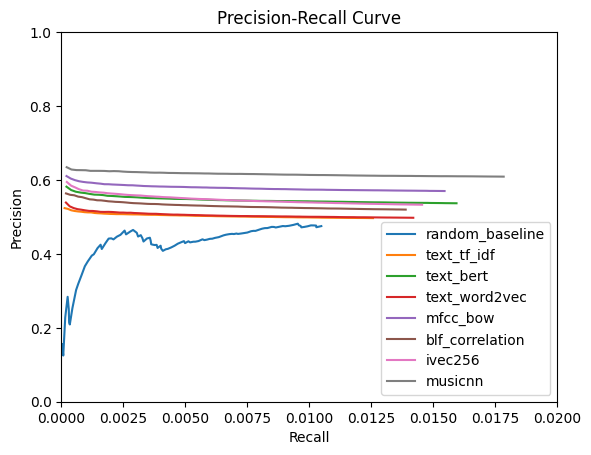

In [24]:
pr.plot()

Processing chunk 1/11
Processing chunk 2/11
Processing chunk 3/11
Processing chunk 4/11
Processing chunk 5/11
Processing chunk 6/11
Processing chunk 7/11
Processing chunk 8/11
Processing chunk 9/11
Processing chunk 10/11
Processing chunk 11/11


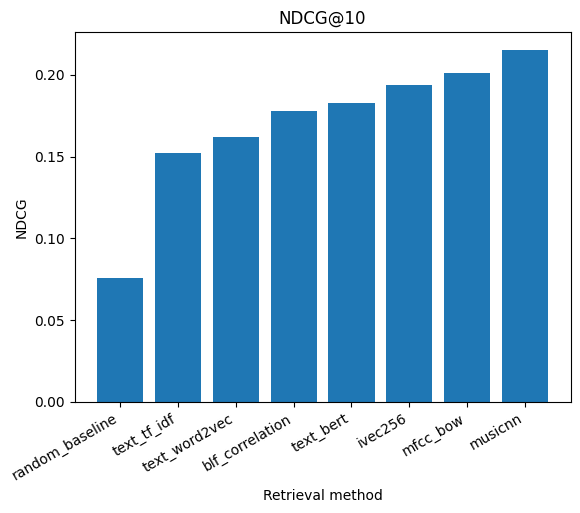

In [25]:
from ndcg import Ndcg

ndcg = Ndcg(10, g)

ndcg.plot()